In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
path = 'https://raw.githubusercontent.com/Paul-scpark/Data-Mining-Practicum-R/main/Data/'
colnames = ['pop', 'profit']
df = pd.read_csv(path + 'ex1data1.txt', header=None, names=colnames)
df

,pop,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


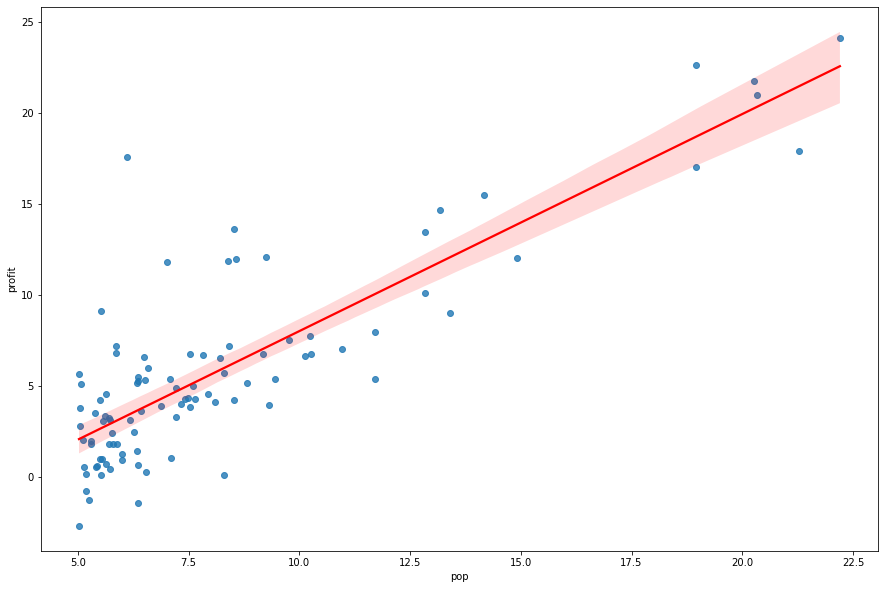

In [3]:
plt.figure(figsize=(15, 10))
sns.regplot(data=df, x="pop", y="profit", 
            line_kws={"color": "red"})
plt.show()

In [4]:
### (1) Hypothesis 설정
def h(df, feature_col, w, b):
    x = df[feature_col]
    return x*w + b

### (2) 손실 함수 설정
def cost(df, feature_col, actual_col, w, b):
    m = df.shape[0]
    return 1/(2*m) * sum( (h(df, feature_col, w, b) - df[actual_col]) ** 2 )

def linear_regression(df, feature_col, actual_col, w, b, alpha, iter_num):
    # 가장 처음 학습하기 전, w와 b 그리고 cost 함수 값을 데이터프레임으로 만들기
    epoch_df = pd.DataFrame({
        'iter': [0], 'w': [w], 'b': [b], 'alpha': [alpha],
        'cost': [cost(df, feature_col, actual_col, w, b)]
    })
    
    ### (3) iter_num 만큼 학습하면서 결과를 epoch_df에 누적시키기
    for i in tqdm(range(1, iter_num+1)):
        b_derivative0 = alpha * np.mean( h(df, feature_col, w, b) - df[actual_col] )
        w_derivative1 = alpha * np.mean( (h(df, feature_col, w, b) - df[actual_col]) * df[feature_col] )
        
        b -= b_derivative0
        w -= w_derivative1
        
        output_df = pd.DataFrame({
            'iter': [i], 'w': [w], 'b': [b], 'alpha': [alpha],
            'cost': [cost(df, feature_col, actual_col, w, b)]
        })
        
        epoch_df = pd.concat([epoch_df, output_df], axis=0)
        
        ### (4) cost 함수의 감소 폭이 10e-6 보다 작은 경우 (거의 움직임이 없는 경우), 학습 중단
        if epoch_df['cost'].iloc[-2] - epoch_df['cost'].iloc[-1] <= 10e-6: break
    
    return epoch_df.reset_index(drop=True)

In [5]:
total_df = pd.DataFrame()
for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.005]:
    w, b = 1, 0 # Initial setting (초기값 임의 셋팅)
    curr_df = linear_regression(df, 'pop', 'profit', w, b, alpha, 5000)
    total_df = pd.concat([total_df, curr_df], axis=0)

total_df.replace([np.inf, -np.inf], np.nan, inplace=True)
total_df = total_df.dropna()
total_df

 61%|███████████████████████▏              | 3054/5000 [00:05<00:03, 586.30it/s]


,iter,w,b,alpha,cost
0,0,1.000000,0.000000,0.0001,7.445856
1,1,0.998392,-0.000232,0.0001,7.419584
2,2,0.996798,-0.000463,0.0001,7.393743
3,3,0.995217,-0.000692,0.0001,7.368323
4,4,0.993649,-0.000920,0.0001,7.343320
...,...,...,...,...,...
3051,3051,1.168168,-3.648265,0.0050,4.482549
3052,3052,1.168190,-3.648488,0.0050,4.482539
3053,3053,1.168213,-3.648711,0.0050,4.482529
3054,3054,1.168235,-3.648934,0.0050,4.482519


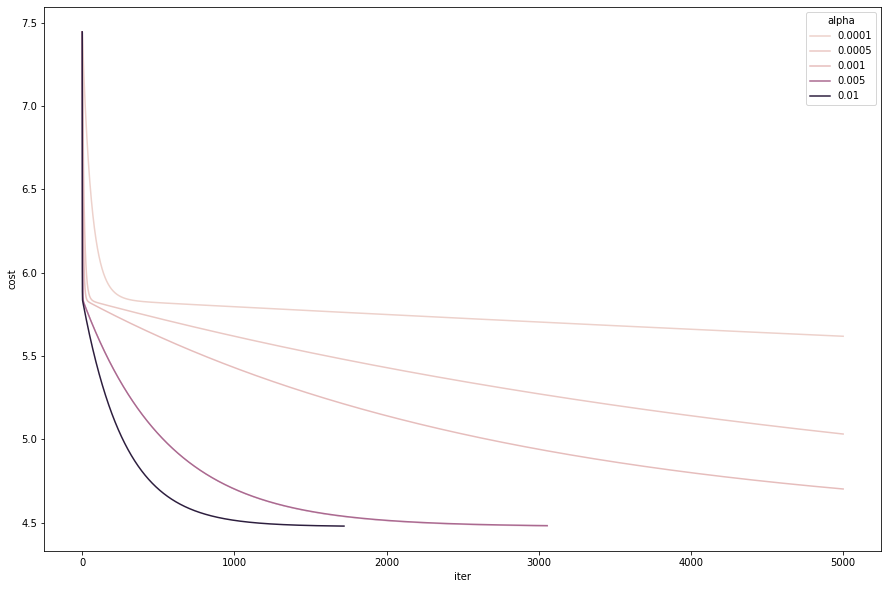

In [6]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='iter', y='cost', hue='alpha', data=total_df)
plt.show()

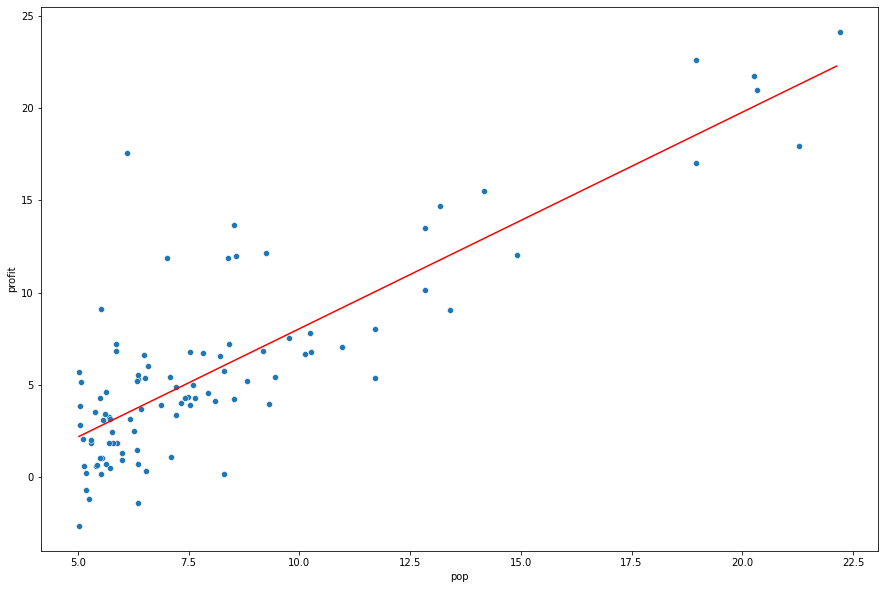

In [7]:
w = total_df[total_df['alpha'] == 0.01].tail(1)['w']
b = total_df[total_df['alpha'] == 0.01].tail(1)['b']

x = np.arange(df['pop'].min(), df['pop'].max(), 0.1)
y = [(w*num + b) for num in x]

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="pop", y="profit")
plt.plot(x, y, 'r')
plt.show()